<a href="https://colab.research.google.com/github/sebastianrdz/portafolio-implementacion/blob/main/Modulo2_NeuralNetwork(Framework).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Sebastian Rodriguez Salinas 
- A00827463
- Sep 14, 2022

# Momento de Retroalimentación: Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución. (Portafolio Implementación)

## Conexion Google Dirve & Redirecionamiento de Directorio

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")  
!pwd

Mounted at /content/gdrive
/content


In [2]:
%cd "/content/gdrive/MyDrive/Colab Notebooks" 
!ls

/content/gdrive/MyDrive/Colab Notebooks
 A00827463_SebastianRdz_Modulo1_Salarios.ipynb
'Copia de A00827463_SebastianRdz_Modulo1_Salarios.ipynb'
'Copy of 4_integration in PCA.ipynb'
 ds_salaries.csv
 mc-donalds-menu.csv
 mercurio.csv
 Mod2_Aug10.ipynb
'Modulo1_Peces&Mercurio.ipynb'
'Modulo2_NeuralNetwork(Framework).ipynb'
'Modulo2_RegresionLineal(Algoritmo).ipynb'
 PlayDataset.csv
 PlayDataset.ipynb
 Practicas
 Retos
 wine.data


## Librerias

In [3]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Manipulacion de datos

In [4]:
# Carga de de dataset
names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
df = pd.read_csv('wine.data', names=names)
# print(df.shape)
# df.describe().T
df.head()
# df.info()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Separamos la variable a analizar, en este caso la classe a la que pertence el alchol.
# Tomamos las columnas resultantes para considerrals dentro de nuestro modelo y esablecemos 
# sus valores con base a 1 para poder visualizar los resultados con base a un total de 1.00 (100%)
y = ['Class'] 
x = list(set(list(df.columns))-set(y))
df[x] = df[x]/df[x].max()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.000000,1.000000,2.000000,3.000000,3.0
Alcohol,178.0,0.876643,0.054742,0.743763,0.833614,0.879973,0.922286,1.0
Malic acid,178.0,0.402819,0.192611,0.127586,0.276293,0.321552,0.531466,1.0
Ash,178.0,0.732668,0.084936,0.421053,0.684211,0.730650,0.791796,1.0
Alcalinity of ash,178.0,0.649831,0.111319,0.353333,0.573333,0.650000,0.716667,1.0
Magnesium,178.0,0.615689,0.088163,0.432099,0.543210,0.604938,0.660494,1.0
Total phenols,178.0,0.591524,0.161302,0.252577,0.449098,0.606959,0.721649,1.0
Flavanoids,178.0,0.399463,0.196626,0.066929,0.237205,0.420276,0.565945,1.0
Nonflavanoid phenols,178.0,0.548264,0.188566,0.196970,0.409091,0.515152,0.662879,1.0
Proanthocyanins,178.0,0.444385,0.159877,0.114525,0.349162,0.434358,0.544693,1.0


In [6]:
# Tomamos los valores de los datos anteriores y utilizamos esto para separar en grupos que podamos 
# analizar para entrenar, y otro para poder probar nuestro modelo.
X_train, X_test, y_train, y_test = train_test_split(df[x].values, df[y].values, test_size=0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [7]:
# Definimos el modelo a ulilizar (Neural Network Multi-layer Perceptron classifier) y lo inicializamos.
# Procedente, utilizamos el modelo y nuestros datos para entrenar con los datos de train y la funcion fit.
# Con base a este modelo ya entrenado, podemos predecir con los valores de x, la classe a la que el alcol pertenece.
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13), activation='relu', solver='adam', max_iter=999)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# Utilizamos "confusion_matrix" para representar como es que se destribuyen los datos atraves de las 3 classes que tenemos precentes.
# Utilizamos "classification_report" para representar la correlaciones y el grado de confiabilidad del modelo con base a los datos proporcionados.
# Todo esto con base a los datos de entrenamiento.
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[51  0  0]
 [ 0 56  0]
 [ 0  0 35]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        35

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [9]:
# Aqui podemos ver las prediciones con base a nuestro modelo y nuestros datos de testing.
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[ 8  0  0]
 [ 0 14  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.93      0.93      0.93        15
           3       0.92      0.92      0.92        13

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



## Conclusión
Dentro de Este modelo se implemento la librería Sklearn para para llevar acabo el modelo nombrado _Neural Network Multi-layer Perceptron classifier_, el cual nos permite modelar con un formato a e conexiones neuronales para hacer predicciones.
<br>

Así mismo, se utilizo el data set ya definido en este curso de _wines.csv_ para correr las predicciones dentro de este. Como métrica de desempeño se considero la clase a la que pertenece cada alcohol (1, 2 o 3). 
<br>

Para definir los valores de entrenamiento, y los valores de prueba, utilize una librería igualmente de Sklearn para dividir los datos de manera aleatoria. Esto nos da nuestros valores Y y X de entrenamiento al igual que nuestros valores Y y X de prueba. Teniendo nuestros valores inicializamos el modelo ya definido por Sklearn, y lo entrenamos por medio de la función _fit()_ en donde le pasamos nuestros valores X de entrenamiento y prueba. Teniendo esto hacemos una predicción con base a nuestras classes para ajustar el modelo con base a las X.
<br>

Teniendo esta predicción acabamos! Podemos visualizar los resultados de dos maneras:
- "confusion_matrix" para representar cómo es que se distribuyen los datos través de las 3 classes que tenemos presentes.
- "classification_report" para representar la correlaciones y el grado de confiabilidad del modelo con base a los datos proporcionados.

En las pruebas realizadas arriba, se puede visualizar que con los datos de entrenamiento obtuvimos un grado de confianza y certeza de 1.00 (100%)
Si embargo en la pruebas realizadas con los datos de prueba, obtuvimos un 0.97 (97%) de certeza.
<br>

Dicho esto, una limitación de esta prueba considero es el tamaño de la muestra. Wines tiene un conjunto de 178 campos por columna. Teniendo mas datos a los que analizar se pudiera realizar un mejor ajuste del modelo y posiblemente una mejor predicción al final.


## Extra

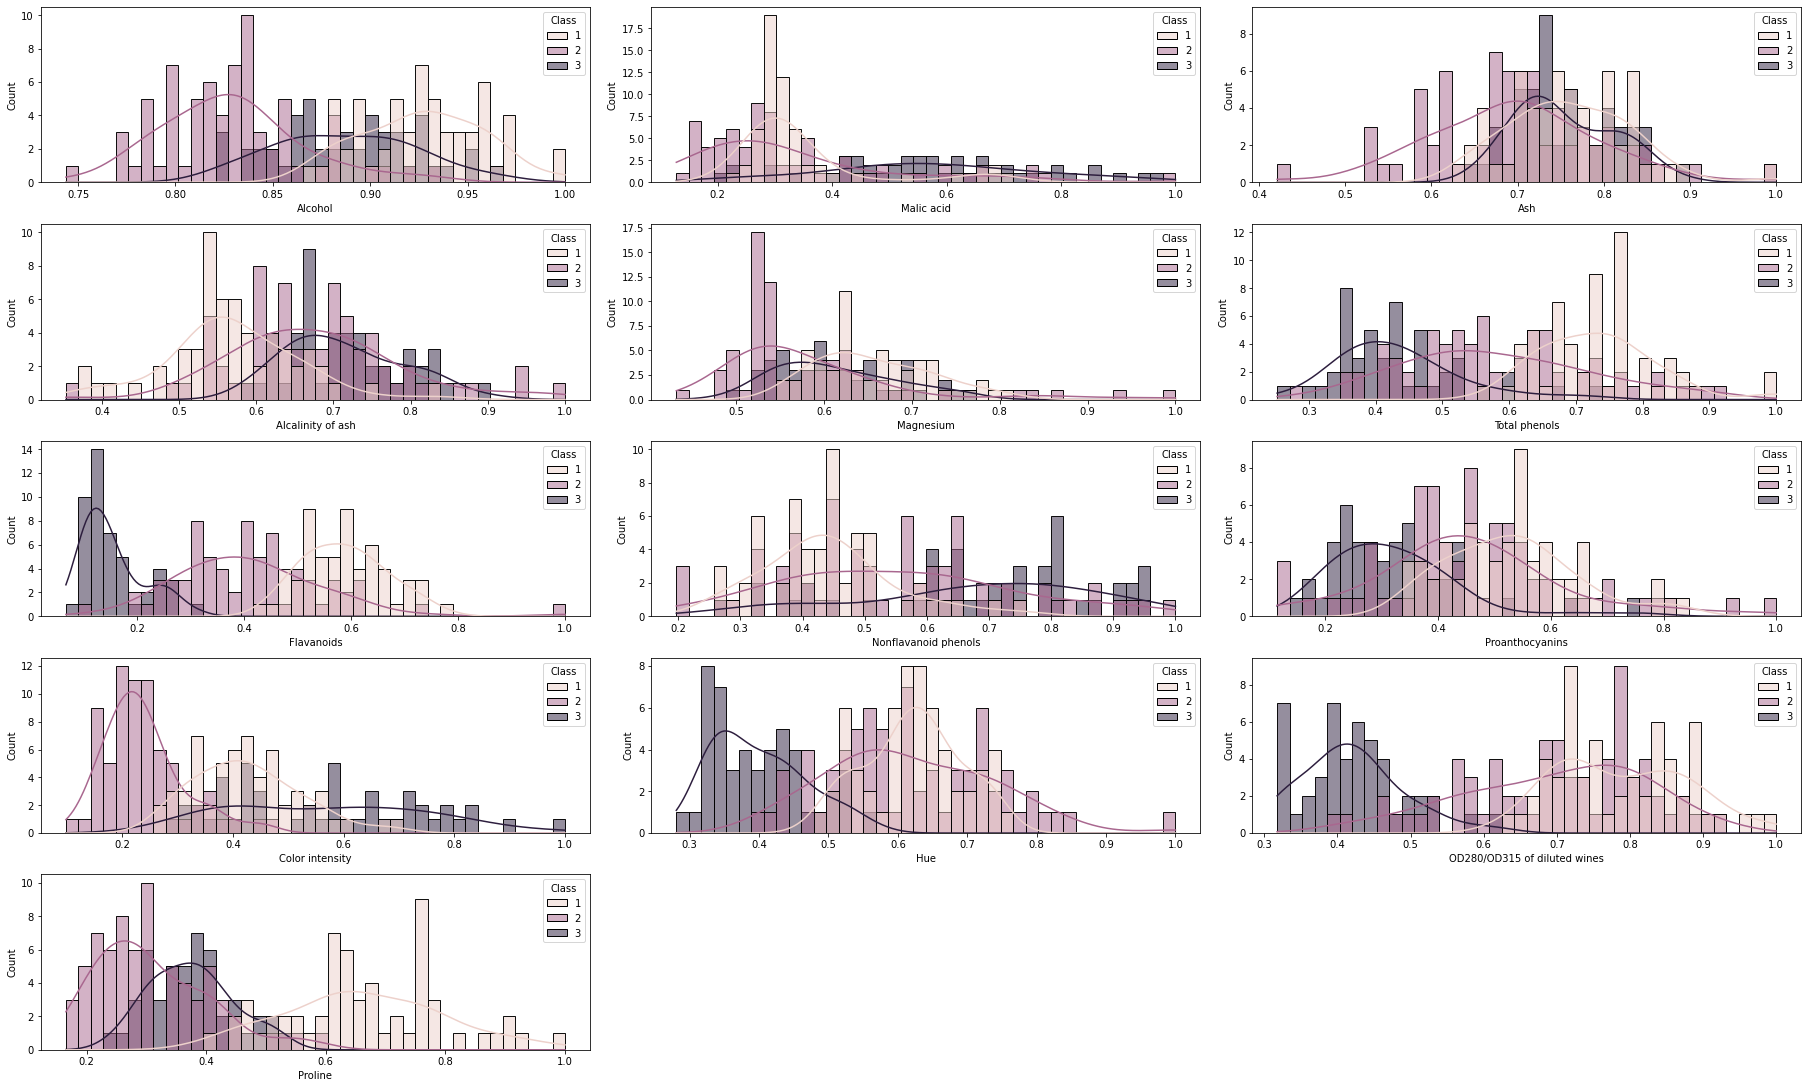

In [10]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
         "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
         "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom=True, labelleft=True)
fig = plt.figure(constrained_layout=True, figsize=(25,15))
gs = GridSpec(5, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[3, 0])
ax11 = fig.add_subplot(gs[3, 1])
ax12 = fig.add_subplot(gs[3, 2])
ax13 = fig.add_subplot(gs[4, 0])

sns.histplot(ax=ax1 ,x='Alcohol', hue='Class', bins=40, data=df, kde=True)
sns.histplot(ax=ax2 ,x='Malic acid', hue='Class', bins=40, data=df, kde=True)
sns.histplot(ax=ax3 ,x='Ash', hue='Class', bins=40, data=df, kde=True)
sns.histplot(ax=ax4 ,x='Alcalinity of ash', hue='Class', bins=40, data=df, kde=True)
sns.histplot(ax=ax5 ,x='Magnesium', hue='Class', bins=40, data=df, kde=True)

sns.histplot(ax=ax6 ,x='Total phenols', hue='Class', bins=40, data=df, kde=True)
sns.histplot(ax=ax7 ,x='Flavanoids', hue='Class', bins=40, data=df, kde=True)
sns.histplot(ax=ax8 ,x='Nonflavanoid phenols', hue='Class', bins=40, data=df, kde=True)
sns.histplot(ax=ax9 ,x='Proanthocyanins', hue='Class', bins=40, data=df, kde=True)
sns.histplot(ax=ax10 ,x='Color intensity', hue='Class', bins=40, data=df, kde=True)

sns.histplot(ax=ax11 ,x='Hue', hue='Class', bins=40, data=df, kde=True)
sns.histplot(ax=ax12 ,x='OD280/OD315 of diluted wines', hue='Class', bins=40, data=df, kde=True)
sns.histplot(ax=ax13 ,x='Proline', hue='Class', bins=40, data=df, kde=True)


## Mejoras de Retroalimentación
Para realizar una mayor cantidad de pruebas, tomaremos el modelo entrenado actual, y haremos pruebas con diferentes secciones del dataset para tratar de verificar la eficaia del modelo.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df[x].values, df[y].values, test_size=0.2, random_state=20)
predict_test = mlp.predict(X_test)
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[10  0  0]
 [ 0 17  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[x].values, df[y].values, test_size=0.2, random_state=40)
predict_test = mlp.predict(X_test)
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[12  0  0]
 [ 0 11  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.92      1.00      0.96        11
           3       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [21]:
X_train, X_test, y_train, y_test = train_test_split(df[x].values, df[y].values, test_size=0.2, random_state=60)
predict_test = mlp.predict(X_test)
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[13  0  0]
 [ 0 15  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.94      1.00      0.97        15
           3       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



In [22]:
X_train, X_test, y_train, y_test = train_test_split(df[x].values, df[y].values, test_size=0.2, random_state=80)
predict_test = mlp.predict(X_test)
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[18  0  0]
 [ 0  8  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [23]:
X_train, X_test, y_train, y_test = train_test_split(df[x].values, df[y].values, test_size=0.2, random_state=100)
predict_test = mlp.predict(X_test)
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[ 8  0  0]
 [ 0 14  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.93      0.93      0.93        15
           3       0.92      0.92      0.92        13

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

